In [1]:
import wave
import os
import matplotlib.pyplot as plt
import numpy as np

#os.listdir('../data/wave/channel1/1001/')

In [2]:
wavereader = wave.open('../data/wave/channel1/1001/100001.wav', 'rb')

In [41]:
wavereader.getnchannels()

1

In [42]:
wavereader.getsampwidth() # 量化位数（byte字节 1byte=8bit比特， 这里也就是2*8=16位采样频率）

2

In [43]:
wavereader.getframerate()

44100

In [44]:
wavereader.getnframes()

298974

In [5]:
params = wavereader.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
print(nframes*1.0/framerate)

6.779455782312925


<class 'numpy.ndarray'>
(298974,)


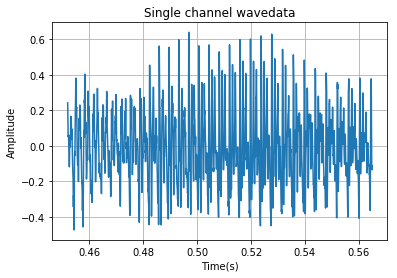

In [26]:
import wave
import os
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

wavereader = wave.open('../data/wave/channel1/1001/100001.wav', 'rb')
params = wavereader.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
strData = wavereader.readframes(nframes)#读取音频，字符串格式
waveData = np.frombuffer(strData,dtype=np.int16)#将字符串转化为int
waveData = waveData*1.0/(max(abs(waveData)))#wave幅值归一化
print(type(waveData))
print(waveData.shape)
# plot the wave
begin = int(nframes*4/60)
end = int(nframes*5/60)
time = np.arange(begin,end)*(1.0 / framerate)
#time = np.arange(0,nframes)*(1.0 / framerate)
plt.plot(time,waveData[begin:end])
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Single channel wavedata")
plt.grid('on')#标尺，on：有，off:无。
plt.savefig('100001.png')

In [10]:
array = np.array([0,1,2,3,4])
array[:]

array([0, 1, 2])

# plot spectrogram with color 
reference https://stackoverflow.com/questions/20069545/2d-plotting-with-colors-like-spectrograms-magnitude-plots

* 声学基础-->我真觉得你应该做笔记
* [extract speech feature](https://github.com/jameslyons/python_speech_features)
* [pyAudioAnalysis](https://github.com/tyiannak/pyAudioAnalysis) Looks like this one is the best


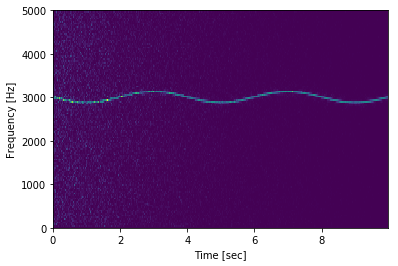

In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()